# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [2]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

In [6]:
# Dataset shape
import numpy as np

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
Number of classes: 100


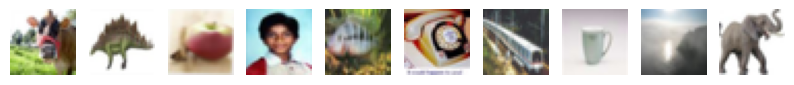

In [8]:
# Show 10 sample images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

### 1b: Data Preprocessing
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [9]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Normalize images: convert to float and scale to range [0,1]

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#One-hot encode the label: from integer to vector
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

# Split the data
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Check the shapes
print(f'Training data shape: {x_train.shape}')
print(f'Validation data shape: {x_val.shape}')
print(f'Test data shape: {x_test.shape}')

Training data shape: (40000, 32, 32, 3)
Validation data shape: (10000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create baseline model
model = Sequential()

# First layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

# Second layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the 2D output to 1D
model.add(Flatten())

# Dense layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,412 (677.39 KB)

 Trainable params: 173,412 (677.39 KB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [13]:
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=32,
    validation_split=0.2,
    verbose=1)

Epoch 1/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 48s 46ms/step - accuracy: 0.0294 - loss: 4.4580 - val_accuracy: 0.1166 - val_loss: 3.8459
Epoch 2/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 44s 44ms/step - accuracy: 0.0854 - loss: 3.9750 - val_accuracy: 0.1559 - val_loss: 3.6667
Epoch 3/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.1210 - loss: 3.7400 - val_accuracy: 0.1925 - val_loss: 3.3877
Epoch 4/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.1391 - loss: 3.5981 - val_accuracy: 0.2175 - val_loss: 3.2834
Epoch 5/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.1572 - loss: 3.4894 - val_accuracy: 0.2395 - val_loss: 3.1811
Epoch 6/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.1728 - loss: 3.4027 - val_accuracy: 0.2482 - val_loss: 3.1257
Epoch 7/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.1869 - loss: 3.3430 - val_accuracy: 0.2501 - val_loss: 3.0818
Epoch 8/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.1906 -

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [15]:
from tensorflow.keras.metrics import TopKCategoricalAccuracy

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

print(f"Test Accuracy: {test_accuracy:.2f}")

# Re-compile the model to include top-5 metric
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', TopKCategoricalAccuracy(k=5)]
)

# Evaluate again (this time with top-5)
results = model.evaluate(x_test, y_test, verbose=1)

print(f"Test Accuracy (Top-1): {results[1]:.2f}")
print(f"Top-5 Accuracy: {results[2]:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2843 - loss: 2.9329
Test Accuracy: 0.28
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.2843 - loss: 2.9329 - top_k_categorical_accuracy: 0.5751
Test Accuracy (Top-1): 0.28
Top-5 Accuracy: 0.58


- **Accuracy**: 0.28
- **Other metric**: Top-5 Accuracy
- **Reason for selection**: Because there are 100 classes in the dataset, it is helpful to check if the correct class is at least in the top 5 predictions, not just the first one.
- **Value of metric:** 0.58
- **Interpretation of metric value**: The model predicted the correct class in its top 5 guesses 58% of the time. This shows that the model is learning useful patterns, even if its first guess is not always correct.

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

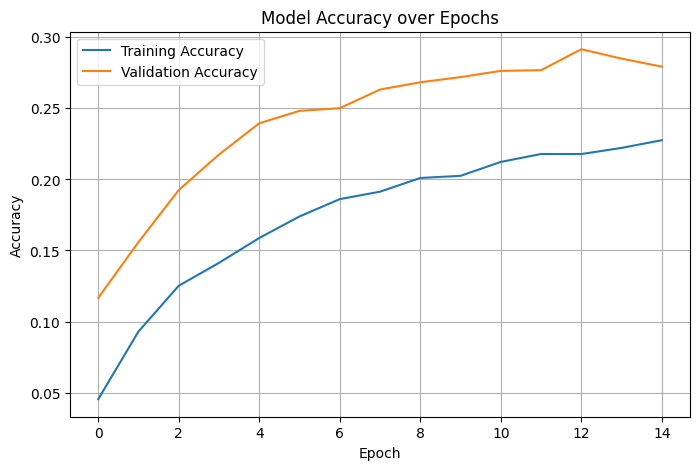

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

**Training and validation accuracy plot**:
The plot shows how the training and validation accuracy change over 15 epochs. Both training and validation accuracy increased over time, which means the model was learning. Validation accuracy was always higher than training accuracy, but the gap started to grow slightly in the last few epochs.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


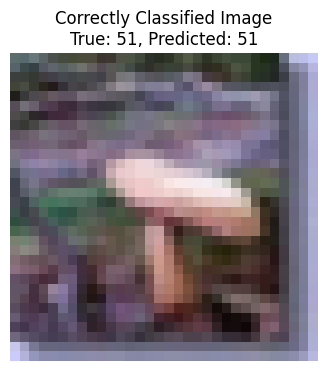

Top 5 Predicted Classes with Probabilities:
Class 51: 0.0529
Class 55: 0.0331
Class 4: 0.0315
Class 77: 0.0310
Class 27: 0.0304


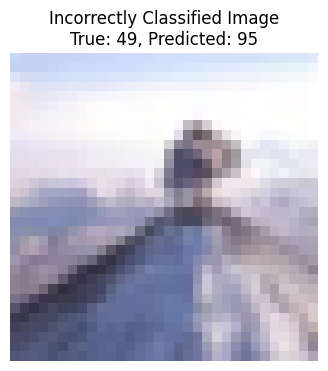

Top 5 Predicted Classes with Probabilities:
Class 95: 0.0730
Class 39: 0.0641
Class 12: 0.0591
Class 44: 0.0443
Class 30: 0.0439


In [17]:
# Predict probabilities for all test images
y_pred_probs = model.predict(x_test)

# Convert probabilities to predicted class labels (Top-1)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Convert true labels from one-hot encoding to class labels
y_true_classes = np.argmax(y_test, axis=1)

# Find correct and incorrect predictions
correct_indices = np.where(y_pred_classes == y_true_classes)[0]
incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]

# Function to show image and top 5 predicted probabilities
def show_image_with_probs(index, title):
    plt.figure(figsize=(4, 4))
    plt.imshow(x_test[index])
    plt.axis('off')
    plt.title(f"{title}\nTrue: {y_true_classes[index]}, Predicted: {y_pred_classes[index]}")
    plt.show()

    # Show top 5 predicted classes and probabilities
    top_5_indices = np.argsort(y_pred_probs[index])[::-1][:5]
    print("Top 5 Predicted Classes with Probabilities:")
    for i in top_5_indices:
        print(f"Class {i}: {y_pred_probs[index][i]:.4f}")

# Show one correctly classified image
show_image_with_probs(correct_indices[0], "Correctly Classified Image")

# Show one incorrectly classified image
show_image_with_probs(incorrect_indices[0], "Incorrectly Classified Image")


The first image shows a correct prediction, where the top predicted class matches the true label. The second image shows a mistake, and the correct class was not in the top prediction. The top-5 probabilities help us understand how confident the model was and if the true class was at least among the top guesses.

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [18]:
from tensorflow.keras.layers import BatchNormalization

# Create an improved CNN model
improved_model = Sequential()

# First convolutional block
improved_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
improved_model.add(BatchNormalization())  # Normalize the outputs
improved_model.add(MaxPooling2D((2, 2)))

# Second convolutional block
improved_model.add(Conv2D(64, (3, 3), activation='relu'))
improved_model.add(BatchNormalization())
improved_model.add(MaxPooling2D((2, 2)))

# Flatten output and add dense layers
improved_model.add(Flatten())
improved_model.add(Dense(128, activation='relu'))  # Increased size
improved_model.add(BatchNormalization())
improved_model.add(Dropout(0.5))  # Reduce overfitting

# Output layer
improved_model.add(Dense(100, activation='softmax'))

# Compile the model
improved_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the new model structure
improved_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,228 (1.25 MB)

 Trainable params: 327,780 (1.25 MB)

 Non-trainable params: 448 (1.75 KB)

I used **Batch Normalization** to improve my model. This technique helps the network learn faster and more reliably by keeping the outputs of each layer in a good range. It also reduces overfitting and makes the training more stable.

I chose this technique because it is easy to use and very effective. It is not complicated to add and works well with convolutional layers.

Batch Normalization does not require special tuning like learning rate or dropout rate. I used the default settings, and just placed the BatchNormalization layer after each Conv2D and Dense layer.

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [20]:
# Re-train the improved model
improved_history = improved_model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 64s 64ms/step - accuracy: 0.4768 - loss: 1.9247 - val_accuracy: 0.3593 - val_loss: 2.6158
Epoch 2/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 77s 59ms/step - accuracy: 0.4967 - loss: 1.8372 - val_accuracy: 0.3615 - val_loss: 2.5807
Epoch 3/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 64s 64ms/step - accuracy: 0.5111 - loss: 1.7872 - val_accuracy: 0.3498 - val_loss: 2.7625
Epoch 4/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 61s 61ms/step - accuracy: 0.5204 - loss: 1.7309 - val_accuracy: 0.3669 - val_loss: 2.6629
Epoch 5/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 61s 61ms/step - accuracy: 0.5348 - loss: 1.6615 - val_accuracy: 0.3490 - val_loss: 2.7973
Epoch 6/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 82s 60ms/step - accuracy: 0.5556 - loss: 1.5885 - val_accuracy: 0.3661 - val_loss: 2.6904
Epoch 7/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 82s 60ms/step - accuracy: 0.5650 - loss: 1.5555 - val_accuracy: 0.3473 - val_loss: 2.7589
Epoch 8/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 60s 60ms/step - accuracy: 0.5644 -

In [21]:
# Evaluate the model on the test set
improved_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', TopKCategoricalAccuracy(k=5)]
)

improved_results = improved_model.evaluate(x_test, y_test, verbose=1)
print(f"Improved Test Accuracy (Top-1): {improved_results[1]:.2f}")
print(f"Improved Top-5 Accuracy: {improved_results[2]:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.3659 - loss: 2.7580 - top_k_categorical_accuracy: 0.6643
Improved Test Accuracy (Top-1): 0.37
Improved Top-5 Accuracy: 0.66


### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

The improved model gave better results compared to the first one. The test accuracy increased from 28% to 37%, and the Top-5 accuracy improved from 58% to 66%. This shows that adding batch normalization and dropout helped the model learn better and generalize more.

However, the model did not reach the 55% test accuracy goal mentioned in the assignment. Even though it didn’t fully meet the requirement, this lab helped me understand much better how to structure a deep learning model and how different layers affect learning.

I believe there is still room for improvement. I would like to try techniques like data augmentation, using different optimizers, and maybe a more complex CNN architecture like ResNet or using transfer learning.

I now feel more confident working with deep learning, and I will keep exploring ways to increase performance.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.